In [46]:
import datetime

In [47]:
from __future__ import print_function
import sys
import os
from glob import glob
from time import time

In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from invisible_cities.database import load_db
from invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.core.wfm_functions as wfm
import invisible_cities.core.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.core.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from invisible_cities.core.core_functions import define_window

In [50]:
import invisible_cities.core.pmaps_functions_c as cpm

In [51]:
from invisible_cities.core.core_functions import lrange

In [52]:
t0 = time()

In [53]:
mydf_file = os.environ['IC_DATA']+'/pmaps_JM/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/tag_88ccade_pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/pmaps_JM/2/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5'
print(mydf_file)

/Users/neus/InvCities/data/pmaps_JM/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5


In [54]:
mydf = pf.read_pmaps(mydf_file)
#mydf = pf.read_pmaps(os.environ['IC_DATA'],'/pmaps_dst_NEXT_v0_08_06_Kr_ACTIVE_86_0_7bar_MCRD_10000.root.h5')


In [55]:
len(set(mydf[0].event))
set(mydf[0].event)|set(mydf[1].event)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


### Access to database and define units

In [56]:
DataPMT = load_db.DataPMT()
units = SystemOfUnits()
adc_to_pes = abs(DataPMT.adc_to_pes.values)
DataSiPM = load_db.DataSiPM()
adc_to_pes_sipm = DataSiPM.adc_to_pes.values
xs = DataSiPM.X.values
ys = DataSiPM.Y.values

In [57]:
DataPMT

,SensorID,ChannelID,PmtID,Active,X,Y,coeff_c,coeff_blr,adc_to_pes,noise_rms,sigma
0,0,0,1,1,-23.9414,65.7785,0.000003,0.001632,-24.3395,0.7060,7.73100
1,1,18,3,1,-44.9951,-53.6231,0.000003,0.001632,-24.8580,0.8744,8.82000
2,2,1,2,1,68.9365,-12.1554,0.000003,0.001611,-26.2934,0.7213,8.01375
3,3,19,4,1,0.0000,185.0000,0.000003,0.001599,-26.4110,0.7624,8.42224
4,4,27,C,1,-118.9160,141.7180,0.000003,0.001567,-26.7098,0.7921,6.23125
5,5,26,B,1,-182.1890,32.1249,0.000004,0.001650,-22.4456,0.8660,5.65180
6,6,9,A,1,-160.2150,-92.5000,0.000003,0.001593,-23.3552,0.7062,7.37840
7,7,8,9,1,-63.2737,-173.8430,0.000003,0.001612,-33.8821,0.7278,11.94840
8,8,23,8,1,63.2737,-173.8430,0.000003,0.001601,-21.8220,0.7303,6.11073
9,9,22,7,1,160.2150,-92.5000,0.000003,0.001593,-25.8020,0.7160,7.46200


In [58]:
DataSiPM.head()

,SensorID,ChannelID,Active,X,Y,adc_to_pes
0,1000,1025,1,-235.0,45.0,15.8202
1,1001,1024,1,-235.0,55.0,16.1037
2,1002,1027,1,-235.0,65.0,17.2044
3,1003,1026,1,-235.0,75.0,15.5304
4,1004,1016,1,-235.0,85.0,15.1095


### myDF is a tuple with 3 indexes  -> 0 = S1, 1 = S2, 2 = S2si

In [59]:
list(map(type, mydf))

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame]

In [60]:
mydf

(       event  evtDaq  peak      time       ene
 0          0       0     0  100050.0  0.354112
 1          0       0     0  100075.0  0.979380
 2          0       0     0  100100.0  1.765931
 3          0       0     0  100125.0  1.874705
 4          0       0     0  100150.0  1.485662
 5          0       0     0  100175.0  0.710406
 6          0       0     0  100200.0  0.574560
 7          0       0     0  100225.0  0.526943
 8          1       1     0  100050.0  0.534720
 9          1       1     0  100075.0  1.513182
 10         1       1     0  100100.0  2.222840
 11         1       1     0  100125.0  1.479931
 12         1       1     0  100150.0  0.801857
 13         1       1     0  100200.0  0.293252
 14         1       1     0  100225.0  0.207822
 15         2       2     0  100050.0  0.305650
 16         2       2     0  100075.0  1.147255
 17         2       2     0  100100.0  1.914787
 18         2       2     0  100125.0  1.654662
 19         2       2     0  100150.0  0

In [61]:
S1df = mydf[0]
S2df = mydf[1]
S2Sidf = mydf[2]

print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))

S1df entries (tbins x events): 51537
S2df entries (tbins x events): 90642
S2Sidf entries: 45075


In [62]:
type(S1df)

pandas.core.frame.DataFrame

#### From above: for S1 the average num of tbins is 5 (~10,000ev)

In [63]:
#mydf[0].peak.values.astype(np.int32)

### Convert Dataframe object (obtained from a pytable readout as a Panda dataframe)

In [64]:
#pf.s12df_to_s12l(mydf[0],evt_max=1)

In [65]:
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 


### Convert an S12df object (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
   

In [66]:
S1df[0:10]

,event,evtDaq,peak,time,ene
0,0,0,0,100050.0,0.354112
1,0,0,0,100075.0,0.979380
2,0,0,0,100100.0,1.765931
3,0,0,0,100125.0,1.874705
4,0,0,0,100150.0,1.485662
5,0,0,0,100175.0,0.710406
6,0,0,0,100200.0,0.574560
7,0,0,0,100225.0,0.526943
8,1,1,0,100050.0,0.534720
9,1,1,0,100075.0,1.513182


In [67]:
print(mydf_file)

/Users/neus/InvCities/data/pmaps_JM/pmaps_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar__10000.root.h5


In [68]:
S1 = pf.s12df_to_s12l(S1df,10000)
S2 = pf.s12df_to_s12l(S2df,10000)

In [69]:
S1

{0: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.,
           100200.,  100225.]),
   array([ 0.35411209,  0.97938037,  1.76593089,  1.8747046 ,  1.48566234,
           0.71040583,  0.57456046,  0.52694321])]},
 1: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100200.,  100225.]),
   array([ 0.53472012,  1.51318192,  2.22284031,  1.47993088,  0.80185723,
           0.29325175,  0.20782222])]},
 2: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.30565047,  1.14725471,  1.91478658,  1.65466189,  0.9070636 ,
           0.30721194])]},
 5: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.44930297,  1.17601717,  1.46336448,  1.4702872 ,  0.83177042,
           0.31194031])]},
 13: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.25339159,  0.51336884,  0.9177013 ,  0.66694999,  0.24607077,
           0.28435501])]},
 14: {0: [array([ 10

In [70]:
S2

{0: {0: [array([ 619586.25  ,  620637.5   ,  621637.5   ,  622637.5   ,
           623637.5   ,  624637.5   ,  625637.5   ,  626637.5   ,
           627637.5   ,  628637.5   ,  629637.5   ,  630513.8125]),
   array([   73.24771881,   146.34724426,   323.28219604,   625.91223145,
            986.15649414,  1201.9564209 ,  1024.45288086,   820.80114746,
            534.3815918 ,   319.07141113,   128.87181091,    44.89778137])]},
 1: {0: [array([ 515877.5  ,  516937.5  ,  517937.5  ,  518937.5  ,  519937.5  ,
           520937.5  ,  521937.5  ,  522937.5  ,  523937.5  ,  524937.5  ,
           526003.125]),
   array([   73.31464386,   199.43107605,   456.17999268,   852.19830322,
           1207.03222656,  1393.12341309,  1135.87512207,   844.6315918 ,
            420.06500244,   195.27610779,    72.79230499])]},
 2: {0: [array([ 384020.    ,  385037.5   ,  386037.5   ,  387037.5   ,
           388037.5   ,  389037.5   ,  390037.5   ,  391037.5   ,
           392041.25  ,  392803.5625]),

In [71]:
np.sum(S2[9][0][1])

6632.5119495391846

#### Select event #9 and plot S2 peak

number of peaks = 1
S12 number = 0, samples = 10 sum in pes =6632.511949539185


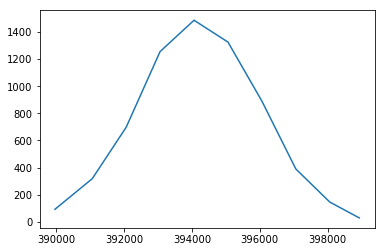

In [72]:
pf.scan_s12(S2[9])

In [73]:
# no funciona...
#pf.index_from_s2(S2[8])

#### Examine S1/S2

In [74]:
S1[0]

{0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.,
          100200.,  100225.]),
  array([ 0.35411209,  0.97938037,  1.76593089,  1.8747046 ,  1.48566234,
          0.71040583,  0.57456046,  0.52694321])]}

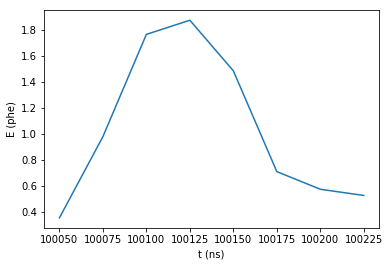

In [75]:
plt.plot(S1[0][0][0],S1[0][0][1])
#same as:
#pf.scan_s12(S1[0])
plt.xlabel("t (ns)")
plt.ylabel("E (phe)")

In [76]:
print('Number of phe in S1 = {}'.format(np.sum(S1[0][0][1])))
print('Number of phe in S2 = {}'.format(np.sum(S2[0][0][1])))


Number of phe in S1 = 8.271699786186218
Number of phe in S2 = 6229.378929138184


In [77]:
S2[0]

{0: [array([ 619586.25  ,  620637.5   ,  621637.5   ,  622637.5   ,
          623637.5   ,  624637.5   ,  625637.5   ,  626637.5   ,
          627637.5   ,  628637.5   ,  629637.5   ,  630513.8125]),
  array([   73.24771881,   146.34724426,   323.28219604,   625.91223145,
           986.15649414,  1201.9564209 ,  1024.45288086,   820.80114746,
           534.3815918 ,   319.07141113,   128.87181091,    44.89778137])]}

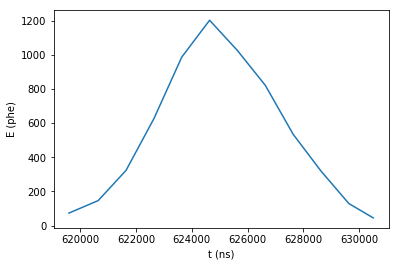

In [78]:
plt.plot(S2[0][0][0],S2[0][0][1])
#same as:
#pf.scan_s12(S1[0])
plt.xlabel("t (ns)")
plt.ylabel("E (phe)")

In [79]:
wS1 = (S1[0][0][0][-1] - S1[0][0][0][0]) / units.mus
wS2 = (S2[0][0][0][-1] - S2[0][0][0][0]) / units.mus
print('Width S1 = {} ns'.format(wS1))
print('Width S2 = {} ns'.format(wS2))

Width S1 = 0.175 ns
Width S2 = 10.9275625 ns


#### List S1/S2keys:

In [80]:
# list(S1.keys()) 
#for key in S1:
#    print(key)

In [81]:
#for key in S2:
#    print(key)

In [82]:
evid_S1min = sorted(S1.keys())[0]
evid_S1max = sorted(S1.keys())[-1]
evid_S2min = sorted(S2.keys())[0]
evid_S2max = sorted(S2.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))

First/last event ID (first item in sorted S1 dictionary): 0/9997
First/last event ID (first item in sorted S2 dictionary): 0/9998


In [83]:
print('Total number of events in S1 = {}'.format(len(S1)))
print('Total number of events in S2 = {}'.format(len(S2)))

Total number of events in S1 = 6935
Total number of events in S2 = 9973


### SiPMs


In [84]:
S2Sidf

,event,evtDaq,peak,nsipm,nsample,ene
0,2,2,0,784,1,19.937115
1,2,2,0,784,2,36.924385
2,2,2,0,784,3,41.829163
3,2,2,0,784,4,21.731544
4,3,3,0,274,2,25.915728
5,3,3,0,274,3,21.248924
6,3,3,0,281,1,28.683107
7,3,3,0,281,2,40.708469
8,3,3,0,281,3,37.875267
9,3,3,0,282,1,35.865326


In [85]:
#S2df

In [86]:
#sipm_i = sf.sipm_with_signal(S2Sidf[0], thr=1*units.adc)

In [87]:
t1 = time()
dt = t1 - t0
print("run in {} s".format(dt))

run in 4.824244022369385 s
